In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")

In [5]:
data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

In [7]:
customer_features = data.groupby('CustomerID').agg(
    TotalSpend=('TotalValue', 'sum'),
    NumTransactions=('TransactionID', 'count'),
    AvgTransactionValue=('TotalValue', 'mean')
).reset_index()


In [9]:
customer_data = customers.merge(customer_features, on='CustomerID', how='left')

In [11]:
customer_data.fillna({'TotalSpend': 0, 'NumTransactions': 0, 'AvgTransactionValue': 0}, inplace=True)


In [13]:
features = ['TotalSpend', 'NumTransactions', 'AvgTransactionValue']
X = customer_data[features]


In [15]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
inertia = []
cluster_range = range(2, 11)  # Test between 2 and 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\Abhigna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhigna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhigna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhigna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

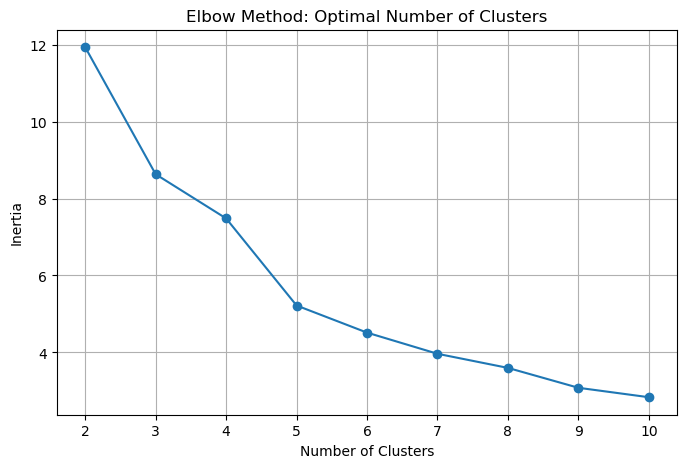

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [21]:
optimal_k = 4  # Replace with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\Abhigna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
db_index = davies_bouldin_score(X_scaled, customer_data['Cluster'])
print(f"Davies-Bouldin Index (DB Index): {db_index}")

Davies-Bouldin Index (DB Index): 1.0783820558335244


In [25]:
silhouette_avg = silhouette_score(X_scaled, customer_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3010023182093583


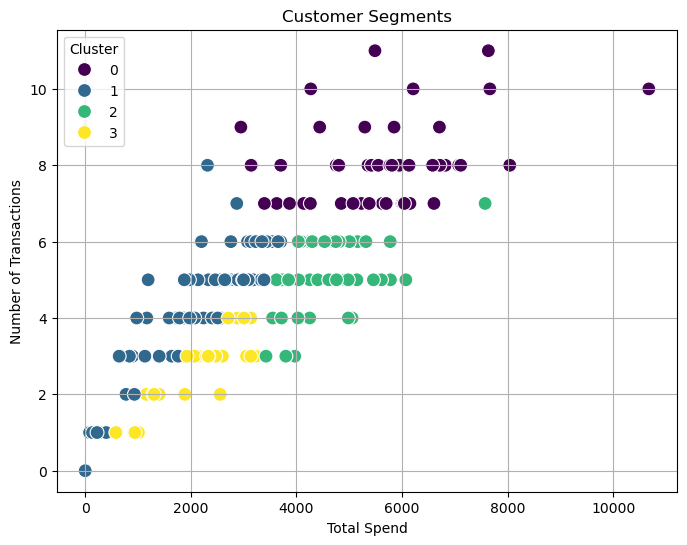

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='TotalSpend', y='NumTransactions', hue='Cluster', data=customer_data,
    palette='viridis', s=100
)
plt.title('Customer Segments')
plt.xlabel('Total Spend')
plt.ylabel('Number of Transactions')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [29]:
cluster_summary = customer_data.groupby('Cluster').agg(
    AvgSpend=('TotalSpend', 'mean'),
    AvgTransactions=('NumTransactions', 'mean'),
    AvgTransactionValue=('AvgTransactionValue', 'mean'),
    NumCustomers=('CustomerID', 'count')
)

In [31]:
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
            AvgSpend  AvgTransactions  AvgTransactionValue  NumCustomers
Cluster                                                                 
0        5562.007826         8.065217           694.063079            46
1        2129.560143         4.271429           467.173226            70
2        4606.899767         5.069767           929.707278            43
3        2121.397561         2.731707           785.902825            41
